In [1]:
%cd ~/desktop/RNA/casp16

/Users/sumishunsuke/Desktop/RNA/casp16


/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/sumishunsuke/micromamba/envs/casp16/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# R1211のenergy計算

In [2]:
pdb_dir="./datasets/casp16/R1211/pdb"

!ls {pdb_dir}/*pdb | wc -l

# !python ./scripts/eval_scores.py --pdb_dir {pdb_dir} --out_dir {pdb_dir}

     152


# Re-process of unprocessed files

In [4]:
# proc un processed files
all_pdb_ids = [f"S_{str(i).zfill(6)}" for i in range(1, 1000+1)]


energies = {}
unprocessed = []
for pdb_id in all_pdb_ids:
    f = f"{pdb_dir}/{pdb_id}.briq.out"
    try:
        with open(f) as fh: lines = fh.readlines()
        energies[f] = float(lines[-1].strip().replace("Energy: ", ""))
    except:
        unprocessed.append(pdb_id)

print(len(energies), len(unprocessed))

1000 0


In [5]:
unprocessed[:5]

[]

In [7]:
# import sys
# sys.path.append("./")
# from src.score import RNA_BRiQ
# from multiprocessing import Pool

# with Pool(7) as pool:
#     results = pool.map(
#         RNA_BRiQ.process_pdb_file_eval,
#         [f"{pdb_dir}/{pdb_id}.pdb" for pdb_id in unprocessed]
#         )

# エネルギー書き出し

In [15]:
out_files = !ls {pdb_dir}/*briq.out

pdb_energy = {}
for out in out_files:
    with open(out) as fh: 
        lines = fh.readlines()
    energies = float(lines[-1].strip().replace("Energy: ", ""))
    basename = out.split("/")[-1].replace(".briq.out", "")
    pdb_energy[basename] = energies


pdb_energy["S_000001"]

import pandas as pd
df_briq = pd.DataFrame(pdb_energy.items(), columns=["pdb", "BRiQscore"])
df_briq.head(3)

,pdb,BRiQscore
0,S_000001,-229.230
1,S_000002,-170.377
2,S_000003,-183.205


In [19]:
df_farfar = pd.read_csv(f"{pdb_dir}/R1211_FARFAR2_scores.csv")
df_farfar = df_farfar[["score", "description"]]
df_farfar.columns = ["FARFARscore", "pdb"]
df_farfar.head(3)

df = pd.merge(df_briq, df_farfar, on="pdb")
# df.to_csv(f"{pdb_dir}/R1211_scores.csv", index=False)

# 可視化

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


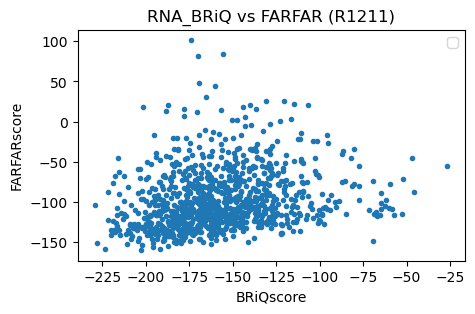

(393, 3)


In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df_scores = pd.read_csv(f"{pdb_dir}/R1211_scores.csv")



n_take = 250
df_briq_top = df_scores.sort_values("BRiQscore", ascending=True).head(n_take)
df_farfar_top = df_scores.sort_values("FARFARscore", ascending=True).head(n_take)
df_both_top = pd.concat([df_briq_top, df_farfar_top]).drop_duplicates()


plt.figure(figsize=(5,3))
plt.scatter(df_scores["BRiQscore"], df_scores["FARFARscore"], marker=".")
# plt.scatter(df_both_top["BRiQscore"], df_both_top["FARFARscore"], marker=".", color="orange", label=f"Top {n_take}")
plt.legend()
plt.xlabel("BRiQscore")
plt.ylabel("FARFARscore")
plt.title("RNA_BRiQ vs FARFAR (R1211)")
plt.show()
print(df_both_top.shape)

In [22]:
df_both_top

,pdb,BRiQscore,FARFARscore
0,S_000001,-229.2300,-104.245
917,S_000918,-228.0230,-151.546
260,S_000261,-223.5860,-158.680
420,S_000421,-221.9200,-122.164
141,S_000142,-221.7120,-87.632
...,...,...,...
669,S_000670,-99.7796,-124.078
76,S_000077,-160.3890,-124.063
49,S_000050,-144.9030,-124.038
636,S_000637,-159.8110,-124.002


In [23]:
# cp selected pdb to new dir    
# !mkdir -p ./datasets/casp16/R1209/pdb_selected
# for pdb in df_both_top["pdb"]:
#     !cp {pdb_dir}/{pdb}.pdb ./datasets/casp16/R1209/pdb_selected

# R1211の距離計算

In [3]:
pdb_dir="./datasets/casp16/R1211/pdb"
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [25]:
%cd ~/desktop/RNA/casp16
# !time python scripts/calc_rmsd.py --pdb_dir datasets/casp16/R1211/pdb --cpu 6

/Users/sumishunsuke/Desktop/RNA/casp16
['S_000001.pdb', 'S_000002.pdb', 'S_000003.pdb', 'S_000004.pdb', 'S_000005.pdb']
Number of pdb files: 1000
Calculating RMSD matrix 1000x1000 using 6 cpus
Calculating RMSD for 0th pdb file
Calculating RMSD for 90th pdb file
Calculating RMSD for 70th pdb file
Calculating RMSD for 50th pdb file
Calculating RMSD for 30th pdb file
Calculating RMSD for 120th pdb file
Calculating RMSD for 10th pdb file
Calculating RMSD for 100th pdb file
Calculating RMSD for 80th pdb file
Calculating RMSD for 60th pdb file
Calculating RMSD for 130th pdb file
Calculating RMSD for 40th pdb file
Calculating RMSD for 20th pdb file
Calculating RMSD for 110th pdb file
Calculating RMSD for 210th pdb file
Calculating RMSD for 160th pdb file
Calculating RMSD for 240th pdb file
Calculating RMSD for 140th pdb file
Calculating RMSD for 270th pdb file
Calculating RMSD for 190th pdb file
Calculating RMSD for 220th pdb file
Calculating RMSD for 170th pdb file
Calculating RMSD for 250th

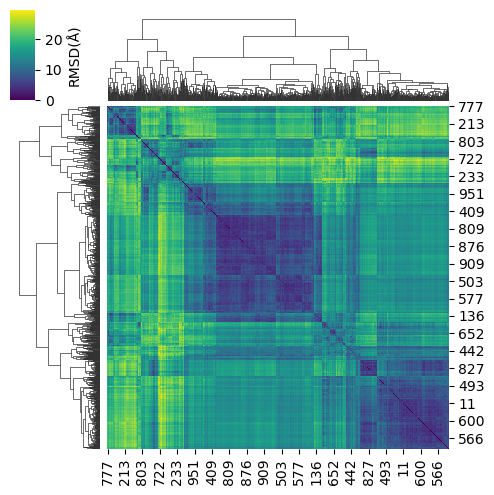

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
g = sns.clustermap(rmsd, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})
# plt.savefig(f"{pdb_dir}/rmsd_clustermap.png", dpi = 300)

# MDS, DBSCAN

In [47]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd)

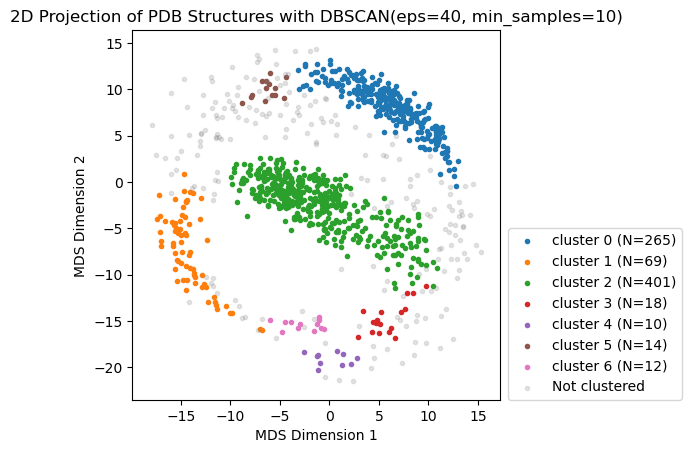

In [79]:
from sklearn.cluster import DBSCAN
eps = 40
min_samples = 10
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd)

plt.figure()
for c in set(clustering.labels_):
    if c == -1: 
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label="Not clustered", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster {c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps}, min_samples={min_samples})')
plt.subplots_adjust(right=0.7)
plt.savefig(f"{pdb_dir}/rmsd_mds_dbscan.png", dpi = 300)
plt.show()


In [65]:
df_scores["cluster"] = clustering.labels_
# df_scores.to_csv(f"{pdb_dir}/R1211_scores_clustered.csv", index=False)
df_scores = pd.read_csv(f"{pdb_dir}/R1211_scores_clustered.csv")
df_scores.head(3)

,pdb,BRiQscore,FARFARscore,cluster
0,S_000001,-229.230,-104.245,0
1,S_000002,-170.377,-131.065,1
2,S_000003,-183.205,-116.796,0


In [78]:
for c in [0,1,2]:
    n = sum(df_scores["cluster"] == c)
    print(f"Cluster {c} (N={n})")
    print(df_scores[df_scores["cluster"] == c].sort_values("BRiQscore").head(5))
    print("**"*20)

Cluster 0 (N=265)
          pdb  BRiQscore  FARFARscore  cluster
0    S_000001   -229.230     -104.245        0
917  S_000918   -228.023     -151.546        0
420  S_000421   -221.920     -122.164        0
612  S_000613   -219.060      -76.165        0
674  S_000675   -218.236     -135.036        0
****************************************
Cluster 1 (N=69)
          pdb  BRiQscore  FARFARscore  cluster
199  S_000200   -217.205     -125.865        1
459  S_000460   -216.892     -116.981        1
941  S_000942   -215.545      -90.206        1
479  S_000480   -208.652     -145.806        1
301  S_000302   -203.929     -144.830        1
****************************************
Cluster 2 (N=401)
          pdb  BRiQscore  FARFARscore  cluster
588  S_000589   -220.232     -135.150        2
492  S_000493   -219.890     -141.742        2
887  S_000888   -217.531      -67.466        2
170  S_000171   -216.894     -130.785        2
202  S_000203   -216.267      -44.811        2
*******************

Text(0, 0.5, 'FARFARscore')

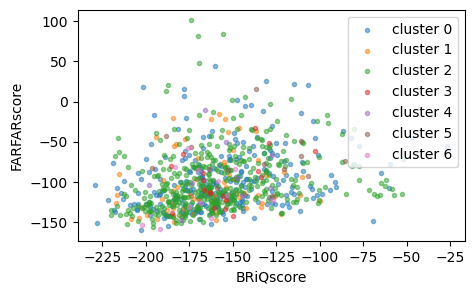

In [72]:
# scatter for each cluster
# hist2d

plt.figure(figsize=(5,3))
for c in set(df_scores["cluster"]):
    if c == -1: continue
    plt.scatter(df_scores[df_scores["cluster"] == c]["BRiQscore"], df_scores[df_scores["cluster"] == c]["FARFARscore"], label=f"cluster {c}", marker=".", alpha=0.5)
    

plt.legend()
plt.xlabel("BRiQscore")
plt.ylabel("FARFARscore")

# リファレンス(8SP9)に対するRMSD

In [10]:
df_scores = pd.read_csv(f"{pdb_dir}/R1211_scores_clustered.csv")
df_rmsd_to_ref = pd.read_csv(f"{pdb_dir}/RMSD_R1211_8SP9.csv", header=None)

df_rmsd_to_ref["pdb"] = df_rmsd_to_ref[0].apply(lambda x: x.split("/")[-1].replace(".pdb", ""))
df_rmsd_to_ref.drop(0, axis=1, inplace=True)
df_rmsd_to_ref.columns = ["RMSD_to_ref", "pdb"]
df_rmsd_to_ref.head(3)

,RMSD_to_ref,pdb
0,21.51,S_000001
1,13.51,S_000002
2,21.76,S_000003


In [11]:
# merge with df_scores
df_scores = pd.merge(df_scores, df_rmsd_to_ref, on="pdb")
df_scores.head(3)

,pdb,BRiQscore,FARFARscore,cluster,RMSD_to_ref
0,S_000001,-229.230,-104.245,0,21.51
1,S_000002,-170.377,-131.065,1,13.51
2,S_000003,-183.205,-116.796,0,21.76


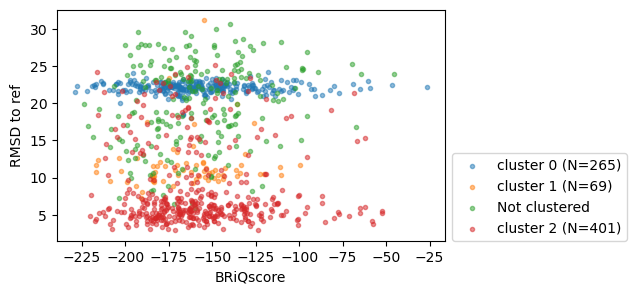

In [13]:
# scatter for each cluster

plt.figure(figsize=(5,3))
for c in df_scores["cluster"].unique():
    n = sum(df_scores["cluster"] == c)
    if n < 20: continue
    if c == -1: label = "Not clustered"
    else: label = f"cluster {c} (N={n})"
    plt.scatter(
        df_scores[df_scores["cluster"] == c]["BRiQscore"],
        df_scores[df_scores["cluster"] == c]["RMSD_to_ref"], 
        label=label, marker=".", alpha=0.5
        )
    

plt.xlabel("BRiQscore")
plt.ylabel("RMSD to ref")
plt.legend(loc = (1.02,0))


In [14]:
# check the to of a cluster
c = 0
for c in [0,1,2]:
    print(f"Cluster {c}(N={sum(df_scores['cluster'] == c)})")
    print(df_scores[df_scores["cluster"] == c].sort_values("RMSD_to_ref").head(5))
    print("**"*20)

Cluster 0(N=265)
          pdb  BRiQscore  FARFARscore  cluster  RMSD_to_ref
987  S_000988   -166.637     -116.452        0        18.36
797  S_000798   -167.118      -58.213        0        18.50
9    S_000010   -203.109     -160.402        0        20.06
325  S_000326   -167.537      -95.355        0        20.49
101  S_000102   -175.337      -66.716        0        20.57
****************************************
Cluster 1(N=69)
          pdb  BRiQscore  FARFARscore  cluster  RMSD_to_ref
163  S_000164   -190.890     -121.460        1         7.28
149  S_000150   -190.309      -97.174        1         8.12
150  S_000151   -194.005      -43.700        1         8.81
978  S_000979   -172.780     -120.989        1         8.85
168  S_000169   -161.195     -126.578        1         9.27
****************************************
Cluster 2(N=401)
          pdb  BRiQscore  FARFARscore  cluster  RMSD_to_ref
844  S_000845   -123.928      -78.240        2         2.93
271  S_000272   -171.256    

# cluster 2にfocusした解析

Text(0, 0.5, 'Count')

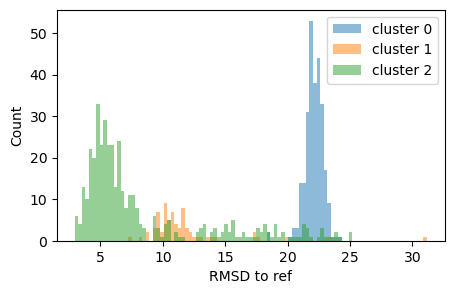

In [15]:
# histo of RMSD in each cluster
# use same bins 

bins = np.linspace(
    min(df_scores["RMSD_to_ref"]),
    max(df_scores["RMSD_to_ref"]),
    100
    )

plt.figure(figsize=(5,3))
for c in [0,1,2]:
    plt.hist(df_scores[df_scores["cluster"] == c]["RMSD_to_ref"], bins=bins, alpha=0.5, label=f"cluster {c}")
plt.legend()
plt.xlabel("RMSD to ref")
plt.ylabel("Count")

In [16]:
df_cluster2_10 = df_scores[df_scores["cluster"] == 2][df_scores["RMSD_to_ref"] < 10]
idx_cluster2_10 = df_cluster2_10.index.tolist()
idx_cluster2_10[:5]

[6, 7, 10, 12, 14]

In [17]:
rmsd = np.load(f"{pdb_dir}/rmsd_matrix_sorted_id.npy")
rmsd_cluster2 = rmsd[idx_cluster2_10][:, idx_cluster2_10]
rmsd_cluster2.shape

(309, 309)

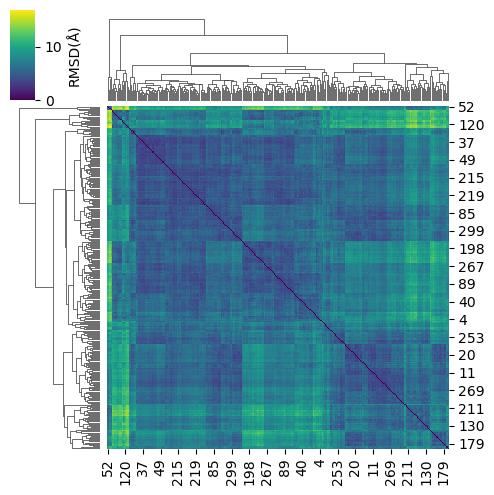

In [19]:
import seaborn as sns
g = sns.clustermap(rmsd_cluster2, cmap="viridis", figsize=(5,5), cbar_kws={'label': 'RMSD(Å)', 'aspect': 20})


# MDS for cluster 2

In [20]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, n_jobs=7, max_iter=1000)
coords = mds.fit_transform(rmsd_cluster2)

Text(0.5, 1.0, 'MDS of cluster 2 (<10Å)\n with DBSCAN(eps=15, min_samples=5)')

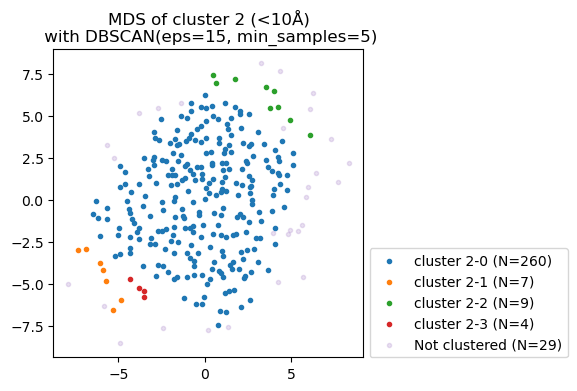

In [21]:
from sklearn.cluster import DBSCAN
eps = 15
min_samples = 5
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(rmsd_cluster2)

plt.figure(figsize=(4,4))

for c in set(clustering.labels_):
    if c == -1: 
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"Not clustered (N={n})", marker=".", alpha=0.2)
    else:
        n = sum(clustering.labels_ == c)
        plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=f"cluster 2-{c} (N={n})", marker=".")
plt.legend(loc = (1.02,0))
plt.title(f'MDS of cluster 2 (<10Å)\n with DBSCAN(eps={eps}, min_samples={min_samples})')


In [22]:

df_cluster2_10["subcluster"] = clustering.labels_   
for subc in [0]:
    n = sum(df_cluster2_10["subcluster"] == subc)
    print(f"Subcluster 2-{subc} (N={n})")
    print(df_cluster2_10[df_cluster2_10["subcluster"] == subc].sort_values("RMSD_to_ref", ascending=True).head(5))
    print(df_cluster2_10[df_cluster2_10["subcluster"] == subc].sort_values("BRiQscore", ascending=True).head(5))

    print("**"*20)

Subcluster 2-0 (N=260)
          pdb  BRiQscore  FARFARscore  cluster  RMSD_to_ref  subcluster
844  S_000845   -123.928      -78.240        2         2.93           0
271  S_000272   -171.256      -82.664        2         3.01           0
798  S_000799   -143.962      -74.066        2         3.05           0
783  S_000784   -175.458      -34.960        2         3.06           0
494  S_000495   -207.784     -143.095        2         3.07           0
          pdb  BRiQscore  FARFARscore  cluster  RMSD_to_ref  subcluster
588  S_000589   -220.232     -135.150        2         4.86           0
492  S_000493   -219.890     -141.742        2         7.73           0
887  S_000888   -217.531      -67.466        2         4.17           0
170  S_000171   -216.894     -130.785        2         4.42           0
618  S_000619   -214.994     -141.979        2         5.23           0
****************************************
